In [1]:
import cv2 
import numpy as np  

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
flat_chess=cv2.imread('C:/Users/sreev/Downloads/OpenCvCourse/Computer-Vision-with-Python/DATA/flat_chessboard.png')
type(flat_chess)
flat_chess=cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)


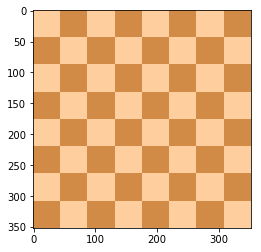

In [7]:
plt.imshow(flat_chess)

In [8]:
gray_flat_chess=cv2.cvtColor(flat_chess,cv2.COLOR_RGB2GRAY)


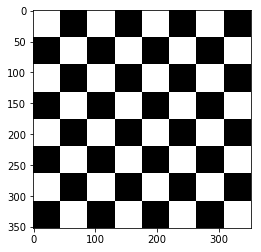

In [10]:
plt.imshow(gray_flat_chess,cmap='gray')

In [13]:
real_chess=cv2.imread('C:/Users/sreev/Downloads/OpenCvCourse/Computer-Vision-with-Python/DATA/real_chessboard.jpg')
real_chess=cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
type(real_chess)

numpy.ndarray

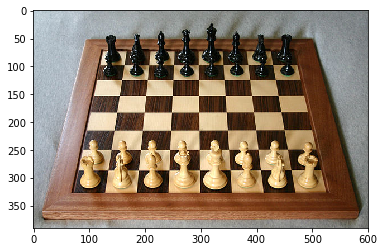

In [14]:
plt.imshow(real_chess)

In [15]:
gray_real_chess=cv2.cvtColor(real_chess,cv2.COLOR_RGB2GRAY)

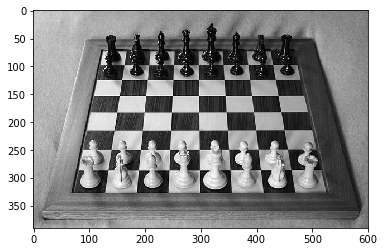

In [17]:
plt.imshow(gray_real_chess,cmap='gray')

# Harris Corner Detection
## cornerHarris Function

src Input single-channel 8-bit or floating-point image.

dst Image to store the Harris detector responses. It has the type CV_32FC1 and the same size as src .

blockSize Neighborhood size (see the details on #cornerEigenValsAndVecs ).

ksize Aperture parameter for the Sobel operator.

k Harris detector free parameter. See the formula in DocString
borderType Pixel extrapolation method. See #BorderTypes.

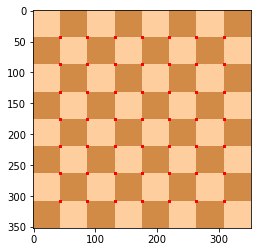

In [20]:
# Convert Gray Scale Image to Float Values
gray = np.float32(gray_flat_chess)

# Corner Harris Detection
dst=cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

# result is dilated for marking the corners, not important to actual corner detection
# this is just so we can plot out the points on the image shown
dst=cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
#dst being greater than 0.01 times the maximum value in the dst
flat_chess[dst>0.01*dst.max()]=[255,0,0]

plt.imshow(flat_chess)

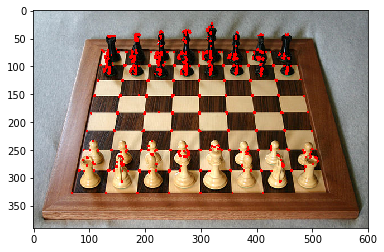

In [21]:
#Doing the same for the real_chess image

# Convert Gray Scale Image to Float Values
gray = np.float32(gray_real_chess)

# Corner Harris Detection
dst=cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

# result is dilated for marking the corners, not important to actual corner detection
# this is just so we can plot out the points on the image shown
dst=cv2.dilate(dst,None)
# Threshold for an optimal value, it may vary depending on the image.
#dst being greater than 0.01 times the maximum value in the dst
real_chess[dst>0.01*dst.max()]=[255,0,0]

plt.imshow(real_chess)

# Shi-Tomasi Corner Detector & Good Features to Track Paper

goodFeatureToTrack Function Parameters

* image Input 8-bit or floating-point 32-bit, single-channel image.
* corners Output vector of detected corners.
* maxCorners Maximum number of corners to return. If there are more corners than are found,the strongest of them is returned. `maxCorners <= 0` implies that no limit on the maximum is set and all detected corners are returned.
* qualityLevel Parameter characterizing the minimal accepted quality of image corners. The parameter value is multiplied by the best corner quality measure, which is the minimal eigenvalue (see #cornerMinEigenVal ) or the Harris function response (see #cornerHarris ). The corners with the quality measure less than the product are rejected. For example, if the best corner has the quality measure = 1500, and the qualityLevel=0.01 , then all the corners with the quality measure less than 15 are rejected.

In [22]:
flat_chess=cv2.imread('C:/Users/sreev/Downloads/OpenCvCourse/Computer-Vision-with-Python/DATA/flat_chessboard.png')
type(flat_chess)
flat_chess=cv2.cvtColor(flat_chess,cv2.COLOR_BGR2RGB)
gray_flat_chess=cv2.cvtColor(flat_chess,cv2.COLOR_RGB2GRAY)

In [24]:
corners=cv2.goodFeaturesToTrack(gray_flat_chess,80,0.01,10)
corners

array([[[308., 308.]],

       [[264., 308.]],

       [[220., 308.]],

       [[176., 308.]],

       [[132., 308.]],

       [[ 88., 308.]],

       [[ 44., 308.]],

       [[308., 264.]],

       [[264., 264.]],

       [[220., 264.]],

       [[176., 264.]],

       [[132., 264.]],

       [[ 88., 264.]],

       [[ 44., 264.]],

       [[308., 220.]],

       [[264., 220.]],

       [[220., 220.]],

       [[176., 220.]],

       [[132., 220.]],

       [[ 88., 220.]],

       [[ 44., 220.]],

       [[308., 176.]],

       [[264., 176.]],

       [[220., 176.]],

       [[176., 176.]],

       [[132., 176.]],

       [[ 88., 176.]],

       [[ 44., 176.]],

       [[308., 132.]],

       [[264., 132.]],

       [[220., 132.]],

       [[176., 132.]],

       [[132., 132.]],

       [[ 88., 132.]],

       [[ 44., 132.]],

       [[308.,  88.]],

       [[264.,  88.]],

       [[220.,  88.]],

       [[176.,  88.]],

       [[132.,  88.]],

       [[ 88.,  88.]],

       [[ 44.,  

In [27]:
#Converting float point values to int
corners=np.int0(corners)

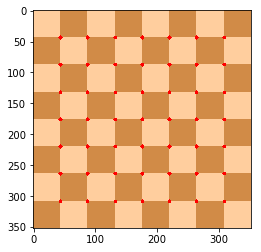

In [28]:
for i in corners:
    x,y=i.ravel()
    cv2.circle(flat_chess,(x,y),3,255,-1)
plt.imshow(flat_chess)

In [29]:
# Doing the same for the real chess image
real_chess=cv2.imread('C:/Users/sreev/Downloads/OpenCvCourse/Computer-Vision-with-Python/DATA/real_chessboard.jpg')
real_chess=cv2.cvtColor(real_chess,cv2.COLOR_BGR2RGB)
gray_real_chess=cv2.cvtColor(real_chess,cv2.COLOR_RGB2GRAY)

In [30]:
corners=cv2.goodFeaturesToTrack(gray_real_chess,80,0.01,10)
corners

array([[[178.,  91.]],

       [[132.,  90.]],

       [[448.,  86.]],

       [[177.,  75.]],

       [[183., 105.]],

       [[207., 288.]],

       [[403.,  87.]],

       [[248., 183.]],

       [[154., 154.]],

       [[274., 109.]],

       [[223.,  92.]],

       [[278., 258.]],

       [[299., 249.]],

       [[261.,  80.]],

       [[197., 216.]],

       [[299., 286.]],

       [[249., 152.]],

       [[270.,  99.]],

       [[299., 214.]],

       [[145., 215.]],

       [[243., 286.]],

       [[317.,  77.]],

       [[365.,  85.]],

       [[190., 286.]],

       [[248., 214.]],

       [[149., 184.]],

       [[227., 110.]],

       [[260., 254.]],

       [[133.,  74.]],

       [[194., 249.]],

       [[246., 249.]],

       [[164.,  98.]],

       [[200., 184.]],

       [[362., 112.]],

       [[344., 152.]],

       [[132., 100.]],

       [[407., 113.]],

       [[298., 182.]],

       [[317., 112.]],

       [[348., 215.]],

       [[205., 249.]],

       [[274.,  

In [31]:
#Converting float point values to int
corners=np.int0(corners)

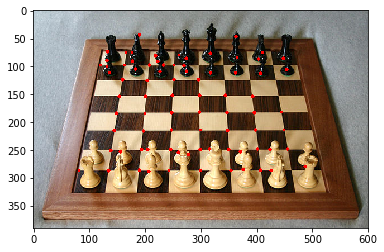

In [32]:
for i in corners:
    x,y=i.ravel()
    cv2.circle(real_chess,(x,y),3,255,-1)
plt.imshow(real_chess)